In [122]:
import sys
if not sys.argv[1] == "-f":
    path = sys.argv[1]
    IF = "01"
    mode = "commandline"
else:
    # 手動で解析する場合はデータのあるpathを指定してください
    path = "/home/amigos/hdd/data/observation/otf_planet2018/n20190928012625_12CO_2-1_otfplanet_jupiter"
    path2 = "/home/amigos/hdd/data/observation/otf_planet2018/n20190928024859_12CO_2-1_otfplanet_jupiter"
    IF = "03"#XFFTSのboard番号　1-->"01"  12-->"12"
    mode = "notebook"

In [123]:
path

'/home/amigos/hdd/data/observation/otf_planet2018/n20190928012625_12CO_2-1_otfplanet_jupiter'

In [124]:
import necstdb
import numpy
import matplotlib.pyplot as plt
import os
import pandas
from datetime import datetime as dt

In [125]:
import sys
sys.path.append("/home/amigos/git/analy_n2data/script")

In [126]:
iflist = ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"]
import make_dset
#dlist = []
#"04"は4IF目のこと。11IF目なら"11"
#for i in iflist:
d, data = make_dset.get_data(path, IF)
d = numpy.array(d)
data = numpy.array(data)
xffts_data = data.T[2:].T
# dlist.append(xffts_data)

KeyError: 'name'

In [127]:
plt.plot(d.T[0])
plt.show()
onmask = d.T[0] == "ON"

NameError: name 'd' is not defined

In [128]:
n = necstdb.opendb(path)

n2 = necstdb.opendb(path2)

In [129]:
nn = n.open_table("status_encoder")
nn2 = n2.open_table("status_encoder")

In [130]:
enc = nn.read()
enc = numpy.array(enc)

enc2 = nn2.read()
enc2 = numpy.array(enc2)

In [131]:
enc_az = enc.T[1].astype(numpy.float64)
enc_el = enc.T[2].astype(numpy.float64)
enc_time = enc.T[4].astype(numpy.float64)

enc_az2 = enc2.T[1].astype(numpy.float64)
enc_el2 = enc2.T[2].astype(numpy.float64)
enc_time2 = enc2.T[4].astype(numpy.float64)

In [132]:
dtime_list = [dt.utcfromtimestamp(i) for i in enc_time]
dtime_list2 = [dt.utcfromtimestamp(i) for i in enc_time2]

In [133]:
from astropy.coordinates import get_body, AltAz, EarthLocation, SkyCoord
import astropy.units as u
from datetime import datetime as dt
from astropy.time import Time
nanten2 = EarthLocation(lat = -22.96995611*u.deg, lon = -67.70308139*u.deg, height = 4863.85*u.m)
import kisa_rev
import calc_coord
from numpy import deg2rad

In [134]:
target_list = get_body("jupiter", Time(dtime_list))
target_list2 = get_body("jupiter", Time(dtime_list2))

In [135]:
target_list.location = nanten2
target_list2.location = nanten2

In [136]:
planet_az = target_list.altaz.az.deg
planet_el = target_list.altaz.alt.deg

planet_az2 = target_list2.altaz.az.deg
planet_el2 = target_list2.altaz.alt.deg

In [137]:
dd2 = [kisa_rev.apply_kisa_test(deg2rad(planet_az[i]), deg2rad(planet_el[i]), "/home/amigos/ros/src/necst/lib/hosei_230.txt") for i in range(len(planet_az))]

In [138]:
dd2_2 = [kisa_rev.apply_kisa_test(deg2rad(planet_az2[i]), deg2rad(planet_el2[i]), "/home/amigos/ros/src/necst/lib/hosei_230.txt") for i in range(len(planet_az2))]

In [139]:
dd2 = numpy.array(dd2)
dd2_2 = numpy.array(dd2_2)

In [140]:
# hosei_enc_az = enc_az/3600 + dd2.T[0]/3600
# hosei_enc_el = enc_el/3600 + dd2.T[1]/3600

# hosei_enc_az2 = enc_az2/3600 + dd2_2.T[0]/3600
# hosei_enc_el2 = enc_el2/3600 + dd2_2.T[1]/3600
len(planet_az)
len(dd2)

36818

In [141]:
hosei_planet_az = planet_az - dd2.T[0]/3600
hosei_planet_el = planet_el - dd2.T[1]/3600
hosei_planet_az2 = planet_az2 - dd2_2.T[0]/3600
hosei_planet_el2 = planet_el2 - dd2_2.T[1]/3600

In [142]:
# len(hosei_enc_az)
# dd2.T[1]/3600


<IPython.core.display.Javascript object>


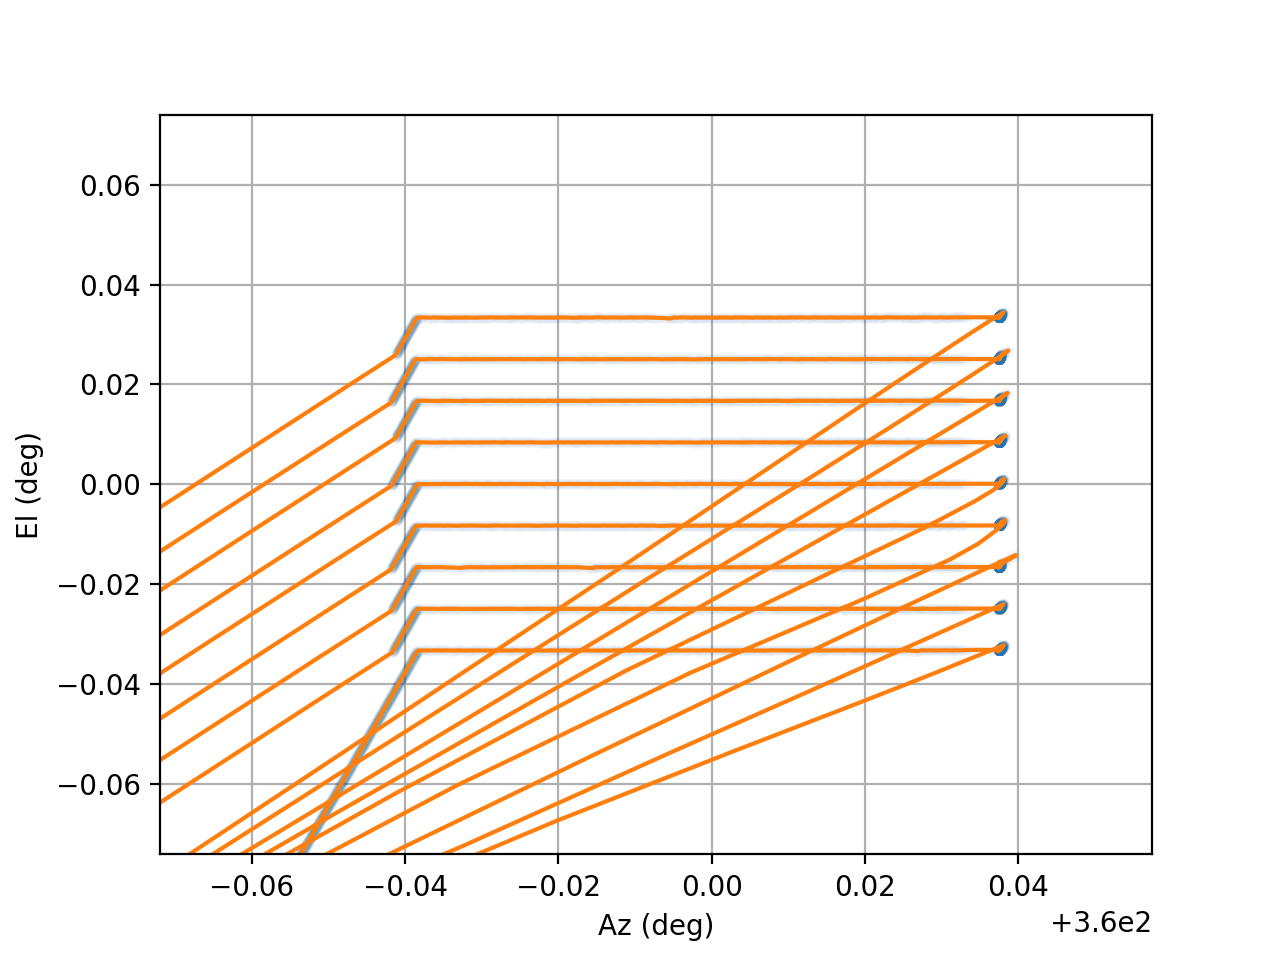

In [144]:
%matplotlib notebook
#plt.plot(hosei_enc_az, hosei_enc_el, ".")
#plt.plot(hosei_planet_az - enc_az/3600, hosei_planet_el - enc_el/3600, ".")
#plt.plot(hosei_planet_az - enc_az/3600, hosei_planet_el - enc_el/3600)
plt.plot(hosei_planet_az2 - enc_az2/3600, hosei_planet_el2 - enc_el2/3600, ".", alpha=0.01)
plt.plot(hosei_planet_az2- enc_az2/3600, hosei_planet_el2 - enc_el2/3600)
#plt.plot(enc_az/3600, enc_el/3600, ".")
# plt.plot(hosei_enc_az - planet_az, hosei_enc_el- planet_el, ".")
# plt.plot(hosei_enc_az - planet_az , hosei_enc_el - planet_el)
# plt.plot(hosei_enc_az2 - planet_az2, hosei_enc_el2- planet_el2, ".")_
# plt.plot(hosei_enc_az2 - planet_az2, hosei_enc_el2 - planet_el2)
#plt.plot(enc_az - planet_az , enc_el - planet_el, ".")
#plt.plot(hosei_enc_az  , hosei_enc_el,  ".")
#plt.plot(planet_az, planet_el, ".")
plt.grid()
plt.xlabel("Az (deg)")
plt.ylabel("El (deg)")
# plt.xlim(-1,1)
# plt.ylim(-1,1)
plt.show()

In [121]:
obs_mode = d.T[0]

NameError: name 'd' is not defined

In [117]:
hotmask = obs_mode == "HOT"
offmask = obs_mode == "OFF"
onmask = obs_mode == "ON"

In [118]:
hot = numpy.mean(xffts_data[hotmask], axis=0)
off = numpy.mean(xffts_data[offmask], axis=0)
on = numpy.mean(xffts_data[onmask], axis=0)

/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [119]:
def chopper_wheel(on, off, hot, temprature = 300):
    Tastar = temprature * (on - off)/(hot - off)
    return Tastar

In [120]:
Tlist = []
for i  in dlist:
    hot = numpy.mean(i[hotmask], axis=0)
    off = numpy.mean(i[offmask], axis=0)
    on = numpy.mean(i[onmask], axis=0)
    T = chopper_wheel(on, off, hot)
    Tlist.append(T)

NameError: name 'dlist' is not defined

In [ ]:
numpy.shape(Tlist)

In [ ]:
# x = numpy.linspace(0, 2000, 32768)#XFFTS bw = 0-2000MHz
# fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# ax[0].plot(x, T)
# #ax[0].set_xlim(xmin, xmax)
# #ax[0].set_ylim(ymin, ymax)
# ax[0].grid(True)
# ax[0].set_xlabel("MHz")
# ax[0].set_ylabel("T [K]")
# ax[0].set_title("Spectra Plot")

# ax[1].plot(x, on, label="ON")
# ax[1].plot(x, off, label="OFF")
# ax[1].plot(x, hot, label="HOT")
# # ax[1].set_xlim(-1500, -1200)
# # ax[1].set_ylim(3000,10000)
# ax[1].set_xlabel("MHz")
# ax[1].set_ylabel("Count")
# ax[1].grid(True)
# ax[1].legend()
# #ax[1].set_yscale("log")
# ax[1].set_title("band chracter plot")

# result_path = path.replace("data", "analysis")
# if not os.path.exists(result_path):
#     os.makedirs(result_path, exist_ok=True)
# plt.savefig(os.path.join(result_path, "result_IF{}.png".format(IF)))
# if mode == "notebook":
#     plt.show()

In [ ]:
fig = plt.figure(figsize=(16,16))
ax = [fig.add_subplot(4, 4, i+1) for i in range(16)]
x = numpy.linspace(0, 2000, 32768)#XFFTS bw = 0-2000MHz
    
# plot hot
for i, (_ax, _tsys) in enumerate(zip(ax, Tlist)):
    _ax.plot(x, Tlist[i], "b-", label="hot")
    #_ax0 = _ax.twinx()
    #_ax0.plot(x, tsys_list[i], "g.", label="Tsys", alpha=0.1)
    _ax.set_xlabel('frequency [MHz]')
    _ax.set_ylabel("T*")
    #_ax.set_yscale("log")
    #_ax0.set_ylabel('Tsys [K]')
    _ax.set_title('IF : {}'.format(i+1))
    #tsys_av = numpy.mean(_tsys)
    #_ax.text(0.05, 0.05, 'Tsys = %.2f'%(tsys_av), transform=_ax0.transAxes)
    #_ax0.set_ylim(0, 600)
    #_ax.legend()
    _ax.grid()

In [ ]:
plt.show()